# Dive Prediction - Results

*Predicting Seabird Diving Behaviour from GPS data*

This notebook presents results of different algorithms for dive prediction based on a dataset of **74 foraging trips of seabirds** (*Sula Variegata*) with both GPS and Time Depth Recorder (TDR) tracking data. Data has been collected on **Ilha Pescadores, Peru** between 2009 and 2013.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def roc(data):
    # globally
    TP = []
    FP = []

    for tt in data.prediction.sort_values().unique():
        all_estim = 1* (data.prediction > tt)
        true_positive = np.mean(all_estim[data.dive == 1])
        true_negative = 1-np.mean(all_estim[data.dive == 0])
        TP.append(true_positive)
        FP.append(1-true_negative)
        
    return (np.array(FP), np.array(TP))

In [3]:
def outsampling(data, resolution):

    data_output = pd.DataFrame()
    for i in data.trip.unique():
        t = data[data.trip == i].copy()

        idx = [i%resolution == 0 for i in range(len(t))]

        traj = t.loc[idx, ('trip', 'datetime', 'lon', 'lat')]

        traj['dive'] = [np.max(t.dive[i:i+resolution]) for i in range(len(t)) if i%resolution==0]
        traj['prediction'] = [np.max(t.prediction[i:i+resolution]) for i in range(len(t)) if i%resolution==0]

        data_output = data_output.append(traj, ignore_index=True)

    return data_output

# Figure 1

In [4]:
LB_ftp_5s = pd.read_csv('./results/LB_ftp_5s.csv')
LB_ftp_15s = pd.read_csv('./results/LB_ftp_15s.csv')
LB_hmm_5s = pd.read_csv('./results/LB_hmm_5s.csv')
LB_hmm_15s = pd.read_csv('./results/LB_hmm_15s.csv')
LB_fcn_5s = pd.read_csv('./results/LB_fcn_lonlatcov_21_1_5s.csv')
LB_fcn_15s = pd.read_csv('./results/LB_fcn_lonlatcov_21_1_15s.csv')
LB_unet_5s = pd.read_csv('./results/LB_unet_matrixlonlatcov_20_20_5s.csv')
LB_unet_15s = pd.read_csv('./results/LB_unet_matrixlonlatcov_20_20_15s.csv')

SV_ftp_5s = pd.read_csv('./results/SV_ftp_5s.csv')
SV_ftp_15s = pd.read_csv('./results/SV_ftp_15s.csv')
SV_hmm_5s = pd.read_csv('./results/SV_hmm_5s.csv')

# SV_hmm_5s_gaps = pd.read_csv('./results/SV_hmm_5s_gaps.csv')

SV_hmm_15s = pd.read_csv('./results/SV_hmm_15s.csv')
SV_fcn_5s = pd.read_csv('./results/SV_fcn_lonlatcov_21_1_5s.csv')
SV_fcn_15s = pd.read_csv('./results/SV_fcn_lonlatcov_21_1_15s.csv')
SV_unet_5s = pd.read_csv('./results/SV_unet_matrixlonlatcov_20_20_5s.csv')
SV_unet_15s = pd.read_csv('./results/SV_unet_matrixlonlatcov_20_20_15s.csv')


LB_ftp_5s_roc = roc(LB_ftp_5s)
LB_ftp_15s_roc = roc(LB_ftp_15s)
LB_hmm_5s_roc = roc(LB_hmm_5s)
LB_hmm_15s_roc = roc(LB_hmm_15s)
LB_fcn_5s_roc = roc(LB_fcn_5s)
LB_fcn_15s_roc = roc(LB_fcn_15s)
LB_unet_5s_roc = roc(LB_unet_5s)
LB_unet_15s_roc = roc(LB_unet_15s)

SV_ftp_5s_roc = roc(SV_ftp_5s)
SV_ftp_15s_roc = roc(SV_ftp_15s)
SV_hmm_5s_roc = roc(SV_hmm_5s)

# SV_hmm_5s_gaps_roc = roc(SV_hmm_5s_gaps)

SV_hmm_15s_roc = roc(SV_hmm_15s)
SV_fcn_5s_roc = roc(SV_fcn_5s)
SV_fcn_15s_roc = roc(SV_fcn_15s)
SV_unet_5s_roc = roc(SV_unet_5s)
SV_unet_15s_roc = roc(SV_unet_15s)

In [5]:
LB_hmm_5s_2 = pd.read_csv('./results/LB_hmm_5s_2.csv')
LB_hmm_5s_2_roc = roc(LB_hmm_5s_2)

In [6]:
(FP, TP) = SV_hmm_5s_roc
-np.trapz(TP, FP)

0.8745376815342899

In [7]:
def loss(data, weight):
    n = len(data)
    x = data.prediction/1.00001
    y = weight * data.dive * np.log(x) + (1-data.dive) * np.log(1 - x)
    return - 1/n * sum(y)

In [8]:
loss(SV_unet_5s, 30)

0.3165850496664579

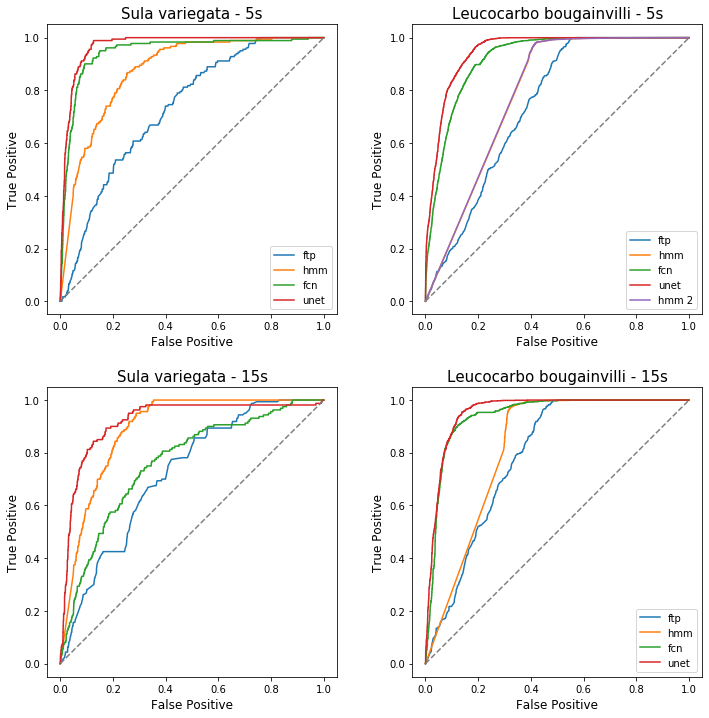

In [9]:
fig, ax = plt.subplots(2,2, figsize=(12,12))
plt.subplots_adjust(hspace=0.25)

# plt.subplot(2,2,1, aspect = 'equal')
ax[0,0].plot(SV_ftp_5s_roc[0], SV_ftp_5s_roc[1], label = 'ftp')
ax[0,0].plot(SV_hmm_5s_roc[0], SV_hmm_5s_roc[1], label = 'hmm')
ax[0,0].plot(SV_fcn_5s_roc[0], SV_fcn_5s_roc[1], label = 'fcn')
ax[0,0].plot(SV_unet_5s_roc[0], SV_unet_5s_roc[1], label = 'unet')
ax[0,0].plot(np.arange(0,1.1, 0.1), np.arange(0,1.1, 0.1), '--', color='grey')

ax[0,0].set_title('Sula variegata - 5s',fontsize= 15)
ax[0,0].legend()

# plt.subplot(2,2,2, aspect = 'equal')
ax[0,1].plot(LB_ftp_5s_roc[0], LB_ftp_5s_roc[1], label = 'ftp')
ax[0,1].plot(LB_hmm_5s_roc[0], LB_hmm_5s_roc[1], label = 'hmm')
ax[0,1].plot(LB_fcn_5s_roc[0], LB_fcn_5s_roc[1], label = 'fcn')
ax[0,1].plot(LB_unet_5s_roc[0], LB_unet_5s_roc[1], label = 'unet')

ax[0,1].plot(LB_hmm_5s_2_roc[0], LB_hmm_5s_2_roc[1], label = 'hmm 2')

ax[0,1].set_title('Leucocarbo bougainvilli - 5s',fontsize= 15)
ax[0,1].plot(np.arange(0,1.1, 0.1), np.arange(0,1.1, 0.1), '--', color='grey')
ax[0,1].legend()

# plt.subplot(2,2,3, aspect = 'equal')
ax[1,0].plot(SV_ftp_15s_roc[0], SV_ftp_15s_roc[1], label = 'ftp')
ax[1,0].plot(SV_hmm_15s_roc[0], SV_hmm_15s_roc[1], label = 'hmm')
ax[1,0].plot(SV_fcn_15s_roc[0], SV_fcn_15s_roc[1], label = 'fcn')
ax[1,0].plot(SV_unet_15s_roc[0], SV_unet_15s_roc[1], label = 'unet')
ax[1,0].set_title('Sula variegata - 15s',fontsize= 15)
ax[1,0].plot(np.arange(0,1.1, 0.1), np.arange(0,1.1, 0.1), '--', color='grey')
# plt.legend()

# plt.subplot(2,2,4, aspect = 'equal')
ax[1,1].plot(LB_ftp_15s_roc[0], LB_ftp_15s_roc[1], label = 'ftp')
ax[1,1].plot(LB_hmm_15s_roc[0], LB_hmm_15s_roc[1], label = 'hmm')
ax[1,1].plot(LB_fcn_15s_roc[0], LB_fcn_15s_roc[1], label = 'fcn')
ax[1,1].plot(LB_unet_15s_roc[0], LB_unet_15s_roc[1], label = 'unet')
ax[1,1].set_title('Leucocarbo bougainvilli - 15s',fontsize= 15)
ax[1,1].plot(np.arange(0,1.1, 0.1), np.arange(0,1.1, 0.1), '--', color='grey')
ax[1,1].legend()

for a in ax.flat:
    a.set_xlabel('False Positive', fontsize= 12)
    a.set_ylabel('True Positive', fontsize= 12)
    
    a.set_aspect('equal')

## maps

In [10]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

In [11]:
from netCDF4 import Dataset
data = Dataset('/home/amdroy/MEGA/DATA/SATELLITE/GEBCO/gebco_2019_pescadores.nc')

lat = data.variables['lat'][:]
lon = data.variables['lon'][:]
lon, lat = np.meshgrid(lon, lat)
bathy = data.variables['elevation'][:]


In [12]:
def my_map(traj):
    
    long_min, long_max = np.min(traj.lon) - 0.1, np.max(traj.lon) + 0.1
    lat_min, lat_max = np.min(traj.lat)  - 0.1, np.max(traj.lat) + 0.1

    # create map using BASEMAP
    m = Basemap(llcrnrlon=long_min,
                llcrnrlat=lat_min,
                urcrnrlon=long_max,
                urcrnrlat=lat_max,
                lat_0=(lat_max - lat_min)/2,
                lon_0=(long_max-long_min)/2,
                projection='merc',
                resolution = 'h',
                area_thresh=10000.,
                )


    m.drawcoastlines()
    m.drawmapboundary(fill_color='#CEECF5')
    m.fillcontinents(color = '#A4A4A4',lake_color='#CEECF5')


    parallels = np.arange(-15,-10,0.1)
    # labels = [left,right,top,bottom]
    m.drawparallels(parallels, labels = [True, False, False, False])
    meridians = np.arange(-80,-75,0.1)
    m.drawmeridians(meridians, labels = [False, False, False, True])

    #bathy
    m.pcolormesh(lon, lat, bathy, latlon = True, cmap='Blues_r', vmin = -500, vmax=100)


    for trip in traj.trip.unique():
        t = traj[traj.trip == trip].copy()
        x, y = m(t.lon.values, t.lat.values)
        #Plot the points on the map
        plt.plot(x,y, color = 'grey')
        
    return m
    

In [38]:
traj = SV_unet_5s

In [39]:
print(np.mean(traj.prediction[traj.dive == 1] > 0.68))
print(np.mean(traj.prediction[traj.dive == 0] > 0.68))

0.8176795580110497
0.049899778457643214


[]

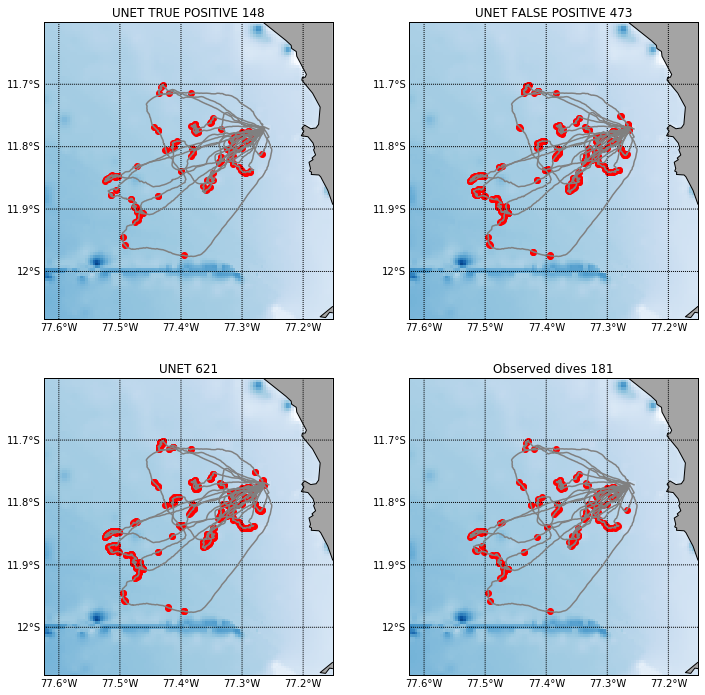

In [40]:
plt.figure(figsize = (12, 12))

plt.subplot(2,2, 1)
m = my_map(traj)
# convert lat and long to map projection coordinates
lons, lats = m(traj.lon.values[(traj['prediction'] > 0.68) & (traj['dive'] == 1)],
               traj.lat.values[(traj['prediction'] > 0.68) & (traj['dive'] == 1)])
# plot points as red dots
m.scatter(lons, lats, marker = 'o', color='r')
plt.title('UNET TRUE POSITIVE ' + str(len(lons)))

plt.subplot(2,2, 2)
m = my_map(traj)
# convert lat and long to map projection coordinates
lons, lats = m(traj.lon.values[(traj['prediction'] > 0.68) & (traj['dive'] == 0)],
               traj.lat.values[(traj['prediction'] > 0.68) & (traj['dive'] == 0)])
# plot points as red dots
m.scatter(lons, lats, marker = 'o', color='r')
plt.title('UNET FALSE POSITIVE ' + str(len(lons)))

plt.subplot(2,2, 3)
m = my_map(traj)
# convert lat and long to map projection coordinates
lons, lats = m(traj.lon.values[(traj['prediction'] > 0.68)],
               traj.lat.values[(traj['prediction'] > 0.68)])
# plot points as red dots
m.scatter(lons, lats, marker = 'o', color='r')
plt.title('UNET ' + str(len(lons)))

plt.subplot(2,2, 4)
m = my_map(traj)
# convert lat and long to map projection coordinates
lons, lats = m(traj.lon.values[(traj['dive'] == 1)],
               traj.lat.values[(traj['dive'] == 1)])
# plot points as red dots
m.scatter(lons, lats, marker = 'o', color='r')
plt.title('Observed dives ' + str(len(lons)))

plt.plot()

In [34]:
148/621

0.23832528180354268

In [ ]:
SV_hmm_5s['lon'] = SV_hmm_5s.x
SV_hmm_5s['lat'] = SV_hmm_5s.y
SV_hmm_5s['trip'] = SV_hmm_5s.ID
traj = SV_hmm_5s

In [ ]:
print(np.mean(traj.prediction[traj.dive == 1] > 0.99999999999999))
print(np.mean(traj.prediction[traj.dive == 0] > 0.99999999999999))

In [ ]:
plt.figure(figsize = (12, 12))

plt.subplot(2,2, 1)
m = my_map(traj)


# convert lat and long to map projection coordinates
lons, lats = m(traj.lon.values[(traj['prediction'] > 0.99999999999999) & (traj['dive'] == 1)],
               traj.lat.values[(traj['prediction'] > 0.99999999999999) & (traj['dive'] == 1)])
# plot points as red dots
m.scatter(lons, lats, marker = 'o', color='r')
plt.title('HMM TRUE POSITIVE ' + str(len(lons)))

plt.subplot(2,2, 2)
m = my_map(traj)
# convert lat and long to map projection coordinates
lons, lats = m(traj.lon.values[(traj['prediction'] > 0.99999999999999) & (traj['dive'] == 0)],
               traj.lat.values[(traj['prediction'] > 0.99999999999999) & (traj['dive'] == 0)])
# plot points as red dots
m.scatter(lons, lats, marker = 'o', color='r')
plt.title('HMM FALSE POSITIVE ' + str(len(lons)))

plt.subplot(2,2, 3)
m = my_map(traj)
# convert lat and long to map projection coordinates
lons, lats = m(traj.lon.values[(traj['prediction'] > 0.99999999999999)],
               traj.lat.values[(traj['prediction'] > 0.99999999999999)])
# plot points as red dots
m.scatter(lons, lats, marker = 'o', color='r')
plt.title('HMM ' + str(len(lons)))

plt.subplot(2,2, 4)
m = my_map(traj)
# convert lat and long to map projection coordinates
lons, lats = m(traj.lon.values[(traj['dive'] == 1)],
               traj.lat.values[(traj['dive'] == 1)])
# plot points as red dots
m.scatter(lons, lats, marker = 'o', color='r')
plt.title('Observed dives ' + str(len(lons)))

plt.plot()

In [ ]:
78/559

# Figure 2

In [43]:
fcn_lonlat = pd.read_csv('./results/SV_fcn_lonlat_21_1_5s.csv')
fcn_lonlatcov = pd.read_csv('./results/SV_fcn_lonlatcov_21_1_5s.csv')
unet_lonlat = pd.read_csv('./results/SV_unet_lonlat_20_20_5s.csv')
unet_lonlatcov = pd.read_csv('./results/SV_unet_lonlatcov_20_20_5s.csv')
unet_matrix = pd.read_csv('./results/SV_unet_matrix_20_20_5s.csv')
unet_matrixcov = pd.read_csv('./results/SV_unet_matrixlonlatcov_20_20_5s.csv')


fcn_lonlat_roc = roc(fcn_lonlat)
fcn_lonlatcov_roc = roc(fcn_lonlatcov)
unet_lonlat_roc = roc(unet_lonlat)
unet_lonlatcov_roc = roc(unet_lonlatcov)
unet_matrix_roc = roc(unet_matrix)
unet_matrixcov_roc = roc(unet_matrixcov)

fcn_lonlat_LOSS = pd.read_csv('./results/SV_fcn_lonlat_21_1_5s_LOSS.csv')
fcn_lonlatcov_LOSS = pd.read_csv('./results/SV_fcn_lonlatcov_21_1_5s_LOSS.csv')
unet_lonlat_LOSS = pd.read_csv('./results/SV_unet_lonlat_20_20_5s_LOSS.csv')
unet_lonlatcov_LOSS = pd.read_csv('./results/SV_unet_lonlatcov_20_20_5s_LOSS.csv')
unet_matrix_LOSS = pd.read_csv('./results/SV_unet_matrix_20_20_5s_LOSS.csv')
unet_matrixcov_LOSS = pd.read_csv('./results/SV_unet_matrixlonlatcov_20_20_5s_LOSS.csv')

In [44]:
(FP, TP) = unet_matrix_roc
-np.trapz(TP, FP)

0.8817210944343967

NameError: name 'SV_hmm_5s_gaps_roc' is not defined

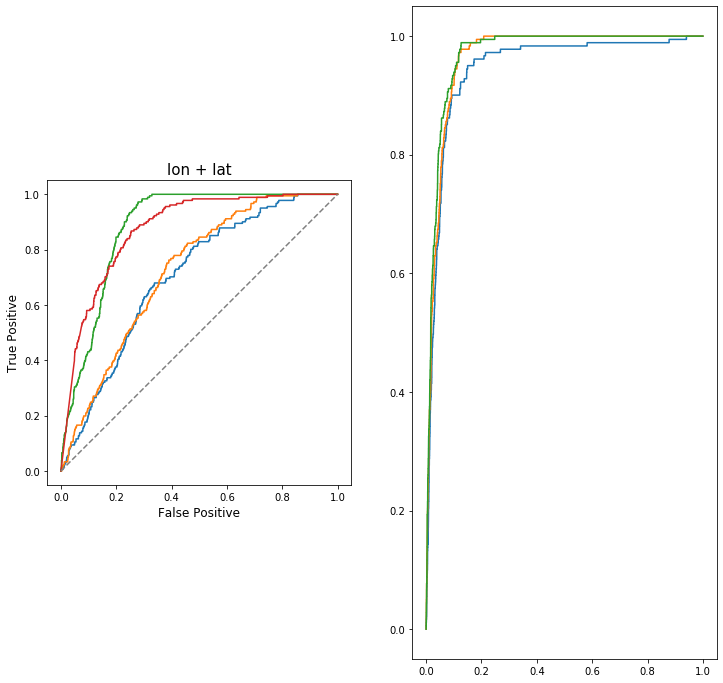

In [45]:
fig, ax = plt.subplots(1,2, figsize=(12,12))
plt.subplots_adjust(hspace=0.25)

# plt.subplot(2,2,1, aspect = 'equal')
ax[0].plot(fcn_lonlat_roc[0], fcn_lonlat_roc[1], label = 'fcn')
ax[0].plot(unet_lonlat_roc[0], unet_lonlat_roc[1], label = 'unet')
ax[0].plot(unet_matrix_roc[0], unet_matrix_roc[1], label = 'unet - matrix')
ax[0].plot(SV_hmm_5s_roc[0], SV_hmm_5s_roc[1], label = 'hmm')
ax[0].plot(np.arange(0,1.1, 0.1), np.arange(0,1.1, 0.1), '--', color='grey')
ax[0].set_title('lon + lat',fontsize= 15)
ax[0].set_xlabel('False Positive', fontsize= 12)
ax[0].set_ylabel('True Positive', fontsize= 12)
ax[0].set_aspect('equal')

# plt.subplot(2,2,2, aspect = 'equal')
ax[1].plot(fcn_lonlatcov_roc[0], fcn_lonlatcov_roc[1], label = 'fcn')
ax[1].plot(unet_lonlatcov_roc[0], unet_lonlatcov_roc[1], label = 'unet')
ax[1].plot(unet_matrixcov_roc[0], unet_matrixcov_roc[1], label = 'unet - matrix')
ax[1].plot(SV_hmm_5s_gaps_roc[0], SV_hmm_5s_gaps_roc[1], label = 'hmm')
ax[1].set_title('lon + lat + cov',fontsize= 15)
ax[1].plot(np.arange(0,1.1, 0.1), np.arange(0,1.1, 0.1), '--', color='grey')
ax[1].set_xlabel('False Positive', fontsize= 12)
ax[1].set_ylabel('True Positive', fontsize= 12)
ax[1].set_aspect('equal')
ax[1].legend()
 
# ax[1,0].plot(np.arange(1,len(fcn_lonlat_LOSS)+1)*512*16/72638, fcn_lonlat_LOSS.step_loss_validation)
# ax[1,0].plot(np.arange(1,len(unet_lonlat_LOSS)+1)*512*16/72638, unet_lonlat_LOSS.step_loss_validation)
# ax[1,0].plot(np.arange(1,len(unet_matrix_LOSS)+1)*512*16/72638, unet_matrix_LOSS.step_loss_validation)
# ax[1,0].set_xlabel('Epochs', fontsize= 12)
# ax[1,0].set_ylabel('Validation Loss', fontsize= 12)
# ax[1,0].set_xlim([0, 2.5])

# ax[1,1].plot(np.arange(1,len(fcn_lonlatcov_LOSS)+1)*512*16/72638, fcn_lonlatcov_LOSS.step_loss_validation)
# ax[1,1].plot(np.arange(1,len(unet_lonlatcov_LOSS)+1)*512*16/72638, unet_lonlatcov_LOSS.step_loss_validation)
# ax[1,1].plot(np.arange(1,len(unet_matrixcov_LOSS)+1)*512*16/72638, unet_matrixcov_LOSS.step_loss_validation)
# ax[1,1].set_xlabel('Epochs', fontsize= 12)
# ax[1,1].set_ylabel('Validation Loss', fontsize= 12)
# ax[1,1].set_xlim([0, 2.5])


# Figure 3